In [112]:
import quandl
import logging
from pathlib import Path
import zipfile
import pandas as pd

quandl_log = logging.getLogger("quandl")
quandl_log.setLevel(logging.DEBUG)
pd.set_option('display.max_columns', None) 
pd.options.display.float_format = '{:,.2f}'.format

In [26]:
import quandl
quandl.save_key("CnoVzXGWwUZ5U7xNJzFC")
print(quandl.ApiConfig.api_key)

CnoVzXGWwUZ5U7xNJzFC


In [27]:
import quandl
quandl.read_key()
print(quandl.ApiConfig.api_key)


CnoVzXGWwUZ5U7xNJzFC


In [186]:
etf_const_df = quandl.get_table("ETFG/CONST", paginate=True) 
financial_ind_ft = quandl.get_table('MER/F1', compnumber="39102", paginate=True)
prices_df = quandl.get(['WIKI/IBM.11','WIKI/TSLA.11','WIKI/DOW.11' ])
#ZACKS = quandl.get_table('ZACKS/FC', paginate=True, ticker=['IBM', 'AAPL'], per_end_date={'gte': '2015-01-01'}, qopts={'columns':['ticker', 'per_end_date']})
tech_ind_df = quandl.get_table('NDW/EQTA', paginate=True)

In [185]:
NDW

,symbol,import_region,country,date,exchange_code,company_name,50_day_ma,150_day_ma,200_day_ma,daily_dist_high,daily_dist_med,daily_dist_low,daily_obos,weekly_dist_high,weekly_dist_med,weekly_dist_low,weekly_obos,pfchart_signal,pfchart_signal_date,pfchart_column,pfchart_column_date,rschart_signal,rschart_signal_date,rschart_column,rschart_column_date,prschart_signal,prschart_signal_date,prschart_column,prschart_column_date,pfchart_trend,pfchart_trend_date,pfchart_pattern,pfchart_pattern_date,tech_attrib,daily_mom,daily_mom_calc,daily_mom_num_days,daily_mom_cross,daily_mom_change,daily_mom_change_date,weekly_mom,weekly_mom_calc,weekly_mom_num_weeks,weekly_mom_cross,weekly_mom_change,weekly_mom_change_date,monthly_mom,monthly_mom_calc,monthly_mom_num_months,monthly_mom_cross,monthly_mom_change,monthly_mom_change_date,auto_generated_comment
None,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,ABEV3-BR,LATINAMERICA1,Brazil,2022-03-18,BVMF,Companhia De Bebidas Das Americas,14.51,15.68,16.21,14.69,13.61,12.53,59.13,17.15,14.60,12.06,-13.80,S,2022-01-07,O,2021-11-29,S,2018-07-04,O,2022-01-18,None,NaT,None,NaT,N,2022-01-07,2,2022-01-07,0,1,0.05,5,12.30,0.02,2022-03-14,0.00,-0.01,2.00,14.60,0.01,2022-03-11,0.00,-0.07,7.00,17.88,-0.03,2021-09-30,[ABEV3-BR] Companhia De Bebidas Das Americas ...
1,ABEV3-BR,LATINAMERICA1,Brazil,2022-03-17,BVMF,Companhia De Bebidas Das Americas,14.53,15.69,16.23,14.69,13.61,12.54,29.75,17.27,14.73,12.18,-31.42,S,2022-01-07,O,2021-11-29,S,2018-07-04,O,2022-01-18,None,NaT,None,NaT,N,2022-01-07,2,2022-01-07,0,1,0.03,4,12.65,0.02,2022-03-14,0.00,-0.02,2.00,14.60,0.00,2022-03-11,0.00,-0.08,7.00,17.88,-0.04,2021-09-30,[ABEV3-BR] Companhia De Bebidas Das Americas ...
2,ABEV3-BR,LATINAMERICA1,Brazil,2022-03-16,BVMF,Companhia De Bebidas Das Americas,14.55,15.71,16.25,14.76,13.65,12.55,11.43,17.27,14.73,12.18,-37.31,S,2022-01-07,O,2021-11-29,S,2018-07-04,O,2022-01-18,None,NaT,None,NaT,N,2022-01-07,2,2022-01-07,0,1,0.02,3,13.11,-0.00,2022-03-14,0.00,-0.02,2.00,14.60,-0.00,2022-03-11,0.00,-0.08,7.00,17.88,-0.04,2021-09-30,[ABEV3-BR] Companhia De Bebidas Das Americas ...
3,ABEV3-BR,LATINAMERICA1,Brazil,2022-03-15,BVMF,Companhia De Bebidas Das Americas,14.58,15.74,16.27,14.90,13.76,12.62,-25.59,17.27,14.73,12.18,-49.49,S,2022-01-07,O,2021-11-29,S,2018-07-04,O,2022-01-18,None,NaT,None,NaT,N,2022-01-07,2,2022-01-07,0,1,0.02,2,12.77,0.01,2022-03-14,0.00,-0.03,2.00,14.60,-0.01,2022-03-11,0.00,-0.09,7.00,17.88,-0.05,2021-09-30,[ABEV3-BR] Companhia De Bebidas Das Americas ...
4,ABEV3-BR,LATINAMERICA1,Brazil,2022-03-14,BVMF,Companhia De Bebidas Das Americas,14.62,15.76,16.29,15.13,13.91,12.69,-48.58,17.27,14.73,12.18,-55.39,S,2022-01-07,O,2021-11-29,S,2018-07-04,O,2022-01-18,None,NaT,None,NaT,N,2022-01-07,2,2022-01-07,0,1,0.01,1,13.06,0.02,2022-03-14,0.00,-0.03,2.00,14.60,-0.01,2022-03-11,0.00,-0.09,7.00,17.88,-0.05,2021-09-30,[ABEV3-BR] Companhia De Bebidas Das Americas ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,A,US1,United States,2021-03-25,XNYS,Agilent Technologies Inc,123.33,113.24,108.07,128.50,122.38,116.26,-7.82,142.42,124.69,106.97,-15.76,S,2021-03-04,X,2021-03-09,B,2017-05-23,X,2016-05-17,B,2011-05-03,O,2020-12-15,P,2020-04-09,2,2021-03-04,4,0,-0.01,4,124.81,0.00,2021-03-22,0.00,-0.03,10.00,133.23,0.00,2021-01-22,1.00,0.01,10.00,119.56,-0.01,2020-06-30,[A] Agilent Technologies Inc (120.84) - This ...
4148,A,US1,United States,2021-03-24,XNYS,Agilent Technologies Inc,123.43,113.08,107.91,128.47,122.46,116.44,-26.89,142.42,124.69,106.97,-21.74,S,2021-03-04,X,2021-03-09,B,2017-05-23,X,2016-05-17,B,2011-05-03,O,2020-12-15,P,2020-04-09,2,2021-03-04,4,0,-0.01,3,124.64,-0.00,2021-03-22,0.00,-0.03,10.00,133.23,-0.00,2021-01-22,1.00,0.00,10.00,119.56,-0.01,2020-06-30,[A] Agilent Technologies Inc (121.98) - This ...
4149,A,US1,United States,202

In [146]:
outfile = Path('merdata.csv')

data = quandl.export_table('MER/F1', filename='db.zip')
zipdata = zipfile.ZipFile('db.zip')
zipinfos = zipdata.infolist()
print(zipinfos)
# iterate through each file
for zipinfo in zipinfos:
    # This will do the renaming
    zipinfo.filename = 'merdata.csv'
    zipdata.extract(zipinfo)


merdata_df = pd.read_csv(outfil

[<ZipInfo filename='MER_F1_0734ac84b03876c110e17b91bf042bc2.csv' compress_type=deflate filemode='-rw-r--r--' file_size=8562668 compress_size=413783>]


In [169]:
# merdata_df.set_index('reportdate').to_csv('test.csv')

In [180]:
merdata_df.set_index('reportdate').to_pickle('test_zip.gzip', compression='gzip')
# pd.read_csv('test.csv')

In [181]:
!ls -l

total 62000
-rw-r--r--@ 1 pete  staff   117442 Mar 21 20:44 ETF.ipynb
-rw-r--r--  1 pete  staff     1070 Mar 16 19:16 LICENSE
-rw-r--r--  1 pete  staff  8562668 Mar 19 12:36 MER_F1_0734ac84b03876c110e17b91bf042bc2.csv
-rw-r--r--  1 pete  staff       15 Mar 16 19:16 README.md
-rw-r--r--  1 pete  staff   414019 Mar 19 14:12 db.zip
-rw-r--r--  1 pete  staff  8562668 Mar 19 14:12 merdata.csv
-rw-r--r--  1 pete  staff  8562642 Mar 21 20:37 test.csv
-rw-r--r--  1 pete  staff   237634 Mar 21 20:41 test.parquet
-rw-r--r--  1 pete  staff  4956885 Mar 21 20:35 test.pickle
-rw-r--r--  1 pete  staff   215097 Mar 21 20:44 test_zip.gzip


In [174]:
merdata_df.set_index('reportdate').to_parquet('test.parquet', compression='GZIP')

In [148]:
merdata_df.shape

(30769, 32)

In [126]:

#merdata_df
merdata_df[['reportdate','compnumber','ticker','statement','indicator', 'amount']].head()

,reportdate,compnumber,ticker,statement,indicator,amount
0,2010-12-31,372,AIG,Balance Sheet,Total Assets Per Share,"4,865.64"
1,2010-12-31,372,AIG,Derived,Revenue to Assets,0.11
2,2010-12-31,372,AIG,Balance Sheet,Long Term Debt,"106,461,000,000.00"
3,2010-12-31,372,AIG,Cash Flow,Cash Flow Per Share,120.39
4,2010-12-31,372,AIG,Derived,Total Debt to Equity,1.25


In [52]:
#data = quandl.get('NSE/OIL')

data = quandl.get_table('ZACKS/FC', ticker='AAPL')
data_cols = data.columns
print(data_cols)

Index(['m_ticker', 'ticker', 'comp_name', 'comp_name_2', 'exchange',
       'currency_code', 'per_end_date', 'per_type', 'per_code',
       'per_fisc_year',
       ...
       'stock_based_compsn_qd', 'cash_flow_oper_activity_qd',
       'net_change_prop_plant_equip_qd', 'comm_stock_div_paid_qd',
       'pref_stock_div_paid_qd', 'tot_comm_pref_stock_div_qd',
       'wavg_shares_out', 'wavg_shares_out_diluted', 'eps_basic_net',
       'eps_diluted_net'],
      dtype='object', length=249)


In [4]:
data['composite_ticker'].value_counts()

EFA    953
EEM    867
SPY    506
Name: composite_ticker, dtype: int64

In [5]:
efa = data[data['composite_ticker'] == 'EFA']

In [6]:
efa['weight'].sum()

1.0033002303000003

In [7]:
data.columns

Index(['etfg_date', 'as_of_date', 'composite_ticker', 'constituent_ticker',
       'constituent_name', 'weight', 'market_value', 'figi',
       'country_of_exchange', 'exchange', 'shares_held', 'asset_class',
       'security_type', 'currency_traded'],
      dtype='object')

In [8]:
efa.sort_values('weight', ascending=False)[0:10]

,etfg_date,as_of_date,composite_ticker,constituent_ticker,constituent_name,weight,market_value,figi,country_of_exchange,exchange,shares_held,asset_class,security_type,currency_traded
None,,,,,,,,,,,,,,
867,2017-04-04,2017-04-04,EFA,NESN,NESTLE SA-REG,0.018214,1.221446e+09,BBG000CPBD63,CH,None,15939276.0,Equity,Common Stock,CHF
868,2017-04-04,2017-04-04,EFA,None,ROCHE HOLDING AG-GENUSSCHEIN,0.013775,9.237528e+08,BBG0089X2L01,CH,None,3599940.0,Equity,Common Stock,CHF
869,2017-04-04,2017-04-04,EFA,NOVN,NOVARTIS AG-REG,0.012729,8.536147e+08,BBG000NQV2C4,CH,None,11437295.0,Equity,Common Stock,CHF
870,2017-04-04,2017-04-04,EFA,HSBA,HSBC HOLDINGS PLC,0.012252,8.216588e+08,BBG000BS1MT4,GB,LONDON STOCK EXCHANGE,101655795.0,Equity,Common Stock,GBP
871,2017-04-04,2017-04-04,EFA,7203,TOYOTA MOTOR CORP,0.010783,7.231074e+08,BBG000BCM915,JP,None,13357064.0,Equity,Common Stock,JPY
872,2017-04-04,2017-04-04,EFA,BATS,BRITISH AMERICAN TOBACCO PLC,0.009360,6.276962e+08,BBG000BG9MW8,GB,LONDON STOCK EXCHANGE,9533377.0,Equity,Common Stock,GBP
873,2017-04-04,2017-04-04,EFA,FP,Total SA,0.008832,5.922901e+08,BBG000C1M473,FR,NYSE EURONEXT - EURONEXT PARIS,11632726.0,Equity,Common Stock,EUR
874,2017-04-04,2017-04-04,EFA,RDSA,ROYAL DUTCH SHELL PLC-A SHS,0.008716,5.844886e+08,BBG000QDCWV4,GB,LONDON STOCK EXCHANGE,22367273.0,Equity,Common Stock,GBP
875,2017-04-04,2017-04-04,EFA,CBA,COMMONWEALTH BANK OF AUSTRAL,0.008539,5.726659e+08,BBG000BS8L64,AU,None,8818749.0,Equity,Common Stock,AUD


In [11]:
efa['country_of_exchange'].unique()

array(['CH', 'GB', 'JP', 'FR', 'AU', 'DE', 'ES', 'BE', 'NL', 'HK', 'DK',
       None, 'IT', 'SE', 'FI', 'US', 'SG', 'NO', 'AT', 'IE', 'PT', 'IL',
       'NZ'], dtype=object)

<AxesSubplot:>

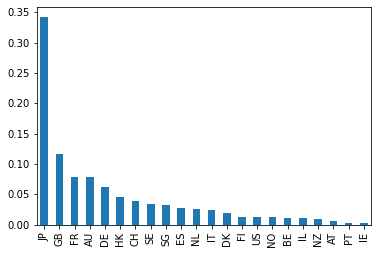

In [12]:
efa['country_of_exchange'].value_counts(normalize=True).plot.bar()

<AxesSubplot:ylabel='country_of_exchange'>

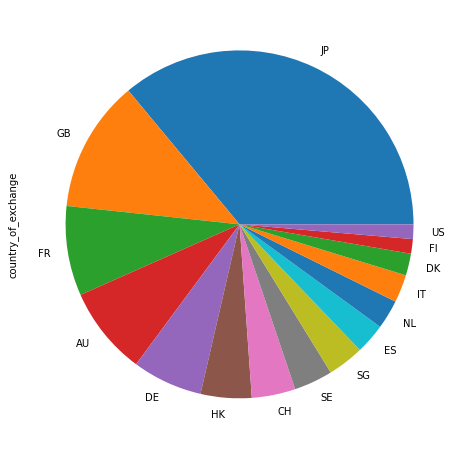

In [13]:
efa['country_of_exchange'].value_counts(normalize=True)[0:15].plot.pie(figsize=(8,8))